# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The dataset contains information about no-show appointments for a medical service. It includes various factors that may influence whether a patient shows up for their appointment. The columns in the dataset are as follows:
> - **Patient_Id**: Unique identifier for each patient.
> - **AppointmentID**: Unique identifier for each appointment.
> - **ScheduledDay**: The day the appointment was scheduled.
> - **AppointmentDay**: The actual day of the appointment.
> - **Age**: The age of the patient.
> - **Gender**: The gender of the patient (Male/Female).
> - **Neighbourhood**: The location of the hospital.
> - **Scholarship**: Indicates whether the patient is enrolled in the Brazilian welfare program Bolsa Família (1 = yes, 0 = no).
> - **No_show**: Indicates whether the patient showed up for their appointment (Yes/No).
> - **Hipertension**: Indicates whether the patient has hypertension (1 = yes, 0 = no).
> - **Diabetes**: Indicates whether the patient has diabetes (1 = yes, 0 = no).
> - **Alcoholism**: Indicates whether the patient has a history of alcoholism (1 = yes, 0 = no).
> - **Handicap**: Indicates whether the patient has a disability (1 = yes, 0 = no).
> - **SMS_received**: Indicates whether the patient received an SMS reminder (1 = yes, 0 = no).
You can copy and paste this markdown directly

### Question(s) for Analysis
> 1. What is the relationship between gender and appointment attendance (no-show status)?
> 2. How do different symptoms (e.g., hypertension, diabetes, alcoholism) correlate with no-show rates across genders?
> 3. Is there a significant difference in appointment attendance among different age groups when controlling for gender and symptoms?

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Load Data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [3]:
# Print Data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Checking out our data, we notice that column 9 "Handcap" is written wrong and should be replaced with "Handicap", checking out the data types we notice that "PatientId" should be integer, both "ScheduledDay" and "AppointmentDay" should be as datetime, and both "Gender" and "No-show" should be as a Category.

In [5]:
# Stastical information on our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


By checking statistics of our data, by checking max and min, we notice that "Handicap" have values exceeding "1" which is wrong because it must include only "1" and "0", we also notice that the "Age" min value is "-1" which is not realistic.

In [6]:
# Null Values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Checking for null values in all columns, Luckily there are NO null values.

In [7]:
# Duplicated Values
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


Checking for duplicated values in all columns, Luckily there are NO duplicated values.

In [8]:
# Checking for invalid Age values
invalid_ages = df[df['Age'] < 0]
invalid_ages

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Confirming and filtering the invalid "Age" values

In [9]:
# Checking for invalid Handicap values
unusual_handicap_values = df[df['Handcap'] > 1]
unusual_handicap_values

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


Confirming and filtering the invalid "Handicap" values

In [10]:
# Unique values of categorical data types
print(df['Gender'].unique())
print(df['No-show'].unique())

['F' 'M']
['No' 'Yes']


Ensuring that our category data is set and provided correctly(no miswritten e.g, spaces or typing "Male" instead of "m".)


## Data Cleaning

In [11]:
# Renaming handicap column
df.rename(columns={'Handcap': 'Handicap'}, inplace=True)

Fixing Handcap by renaming it to it's correct name "Handicap".

In [12]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Making dataframe without any possible invalid data
df = df[(df['Age'] >= 0) & (df['Handicap'] <= 1)]

Cleaning invalid values we have spotted.

In [13]:
# Changing ScheduledDay and AppointmentDay to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [14]:
# Changing Gender and No-show to category
df['Gender'] = df['Gender'].astype('category')
df['No-show'] = df['No-show'].astype('category')

In [15]:
# Changing PatientId to integer
df['PatientId'] = df['PatientId'].astype('int64')

Correcting the data types.

In [16]:
# Ensuring no invalid Age values in the new dataframe
invalid_ages = df[df['Age'] < 0]
invalid_ages

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


In [17]:
# Ensuring no invalid Handicap values in the new dataframe
unusual_handicap_values = df[df['Handicap'] > 1]
unusual_handicap_values

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show


Ensuring there is no invalid values anymore and the cleaning is well-done.

In [18]:
# Print Data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
# Data Information after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110327 non-null  int64              
 1   AppointmentID   110327 non-null  int64              
 2   Gender          110327 non-null  category           
 3   ScheduledDay    110327 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110327 non-null  datetime64[ns, UTC]
 5   Age             110327 non-null  int64              
 6   Neighbourhood   110327 non-null  object             
 7   Scholarship     110327 non-null  int64              
 8   Hipertension    110327 non-null  int64              
 9   Diabetes        110327 non-null  int64              
 10  Alcoholism      110327 non-null  int64              
 11  Handicap        110327 non-null  int64              
 12  SMS_received    110327 non-null  int64              
 13  No-show       

In [20]:
# Stastical information abour our data after cleaning
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What is the relationship between gender and appointment attendance (no-show status)?)

**Gender Distribution**

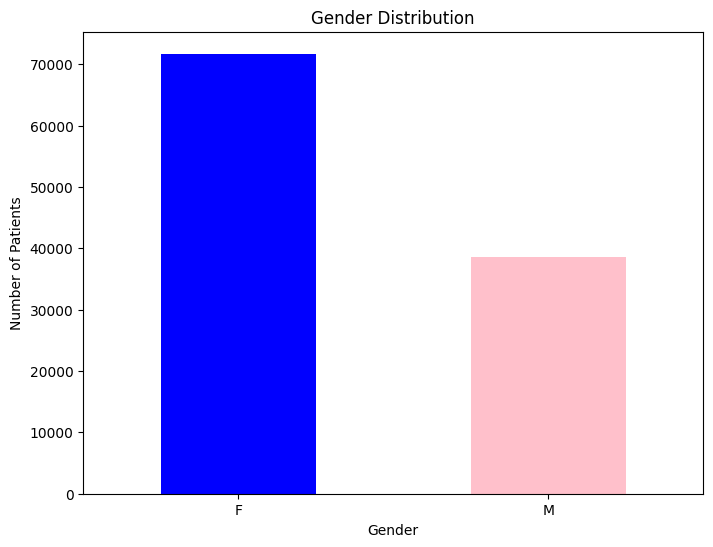

In [21]:
# Gender distribution
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

In [22]:
# Function Preparation
def myPercentagePlot(df,xvar,kind='bar',color=['r','g'],lcolor='orange',stacked=True,figsize=[14,5],normalize=True,mul=100):
    # set options for plot
    kwargs={'edgecolor':'black','rot':0,'width':0.8,'color':color,'stacked':stacked} if kind=='bar' else {'color':color}
    # data prep
    data=df.groupby(xvar)['No-show'].value_counts(normalize=normalize).mul(mul).unstack()
    # plot
    data.plot(kind=kind,figsize=figsize,**kwargs);
    # plot overall mean for visual analysis
    if normalize:
        plt.axhline(y=df['No-show'].value_counts(normalize=normalize)['No']*mul,color=lcolor,linestyle='-',label='All Patients');
    xvar=xvar.replace('_',' ')
    plt.title(f'Effect of {xvar} on Patient Attendance'.title(),fontsize=14,weight='bold')
    plt.xlabel(xvar.title(),fontsize=10,weight='bold')
    plt.ylabel(f'{"Percentage" if normalize else "Frequency"}'.title(),fontsize=10,weight='bold')
    plt.legend(title=f'Attend{"Percentage" if normalize else "Frequency"}')

**Gender vs. No-show Status**

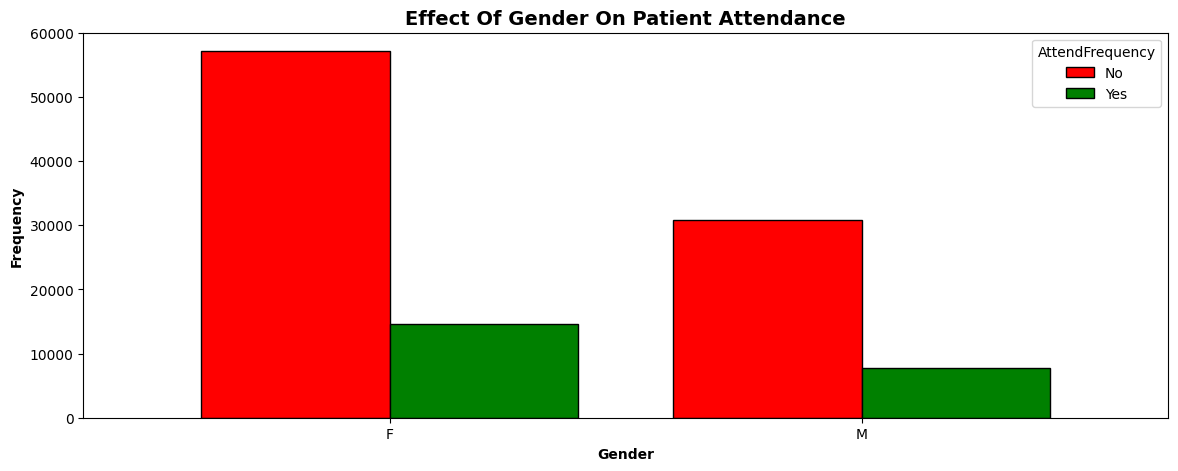

In [23]:
# Gender vs No-show status
myPercentagePlot(df,'Gender',normalize=False,mul=1,stacked=False)

As we notice from the charts, we can observe that females have a higher overall attendance than males, as shown in the first chart. However, in terms of no-show rates, both genders exhibit similar trends, with females showing a slightly higher number of no-shows in absolute terms, likely due to their higher representation in the dataset. The second chart highlights that, relative to their attendance numbers, the no-show rate between genders does not differ drastically, suggesting that gender alone may not be a strong predictor of no-show behavior.

### Research Question 2  (How do different symptoms (e.g., hypertension, diabetes, alcoholism) correlate with no-show rates across genders?)

**Symptoms Distribution**

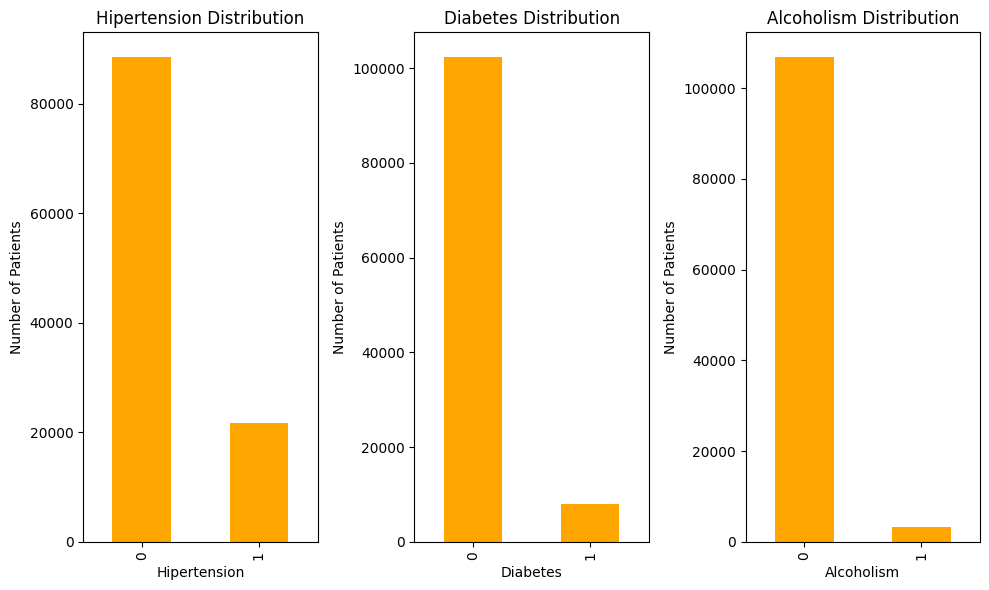

In [24]:
# Distribution of symptoms
symptoms = ['Hipertension', 'Diabetes', 'Alcoholism']
plt.figure(figsize=(10, 6))
for symptom in symptoms:
    plt.subplot(1, 3, symptoms.index(symptom) + 1)
    df[symptom].value_counts().plot(kind='bar', color='orange')
    plt.title(f'{symptom} Distribution')
    plt.xlabel(symptom)
    plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

**Symptoms vs. No-show Status**

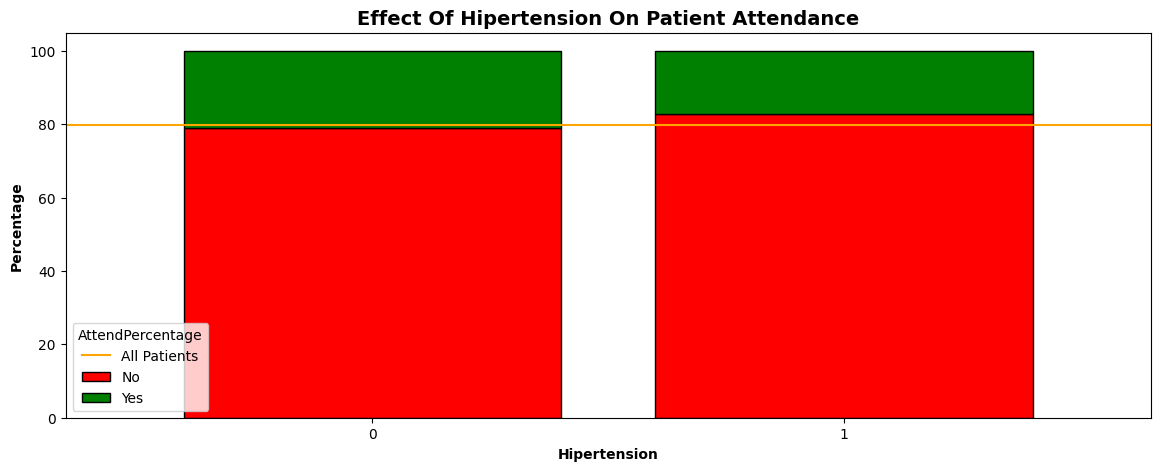

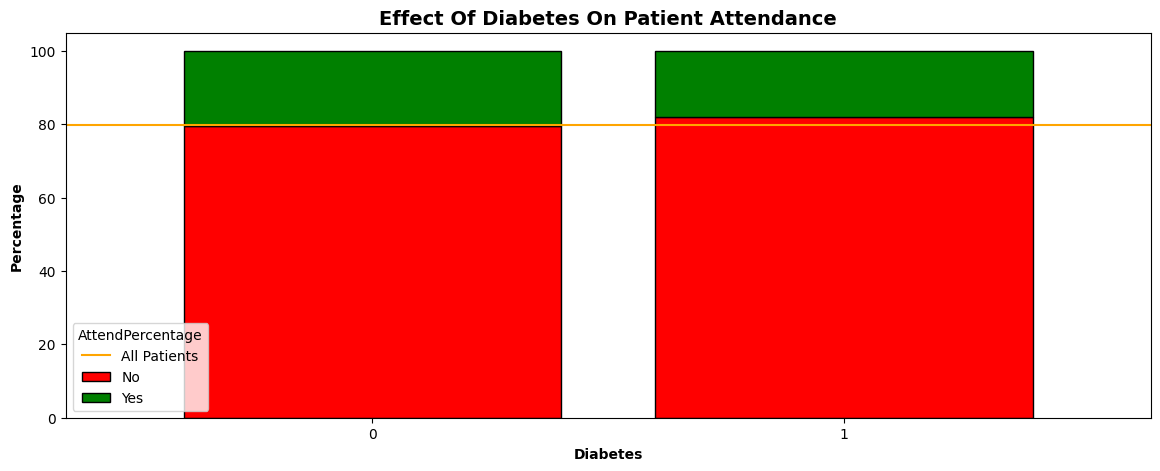

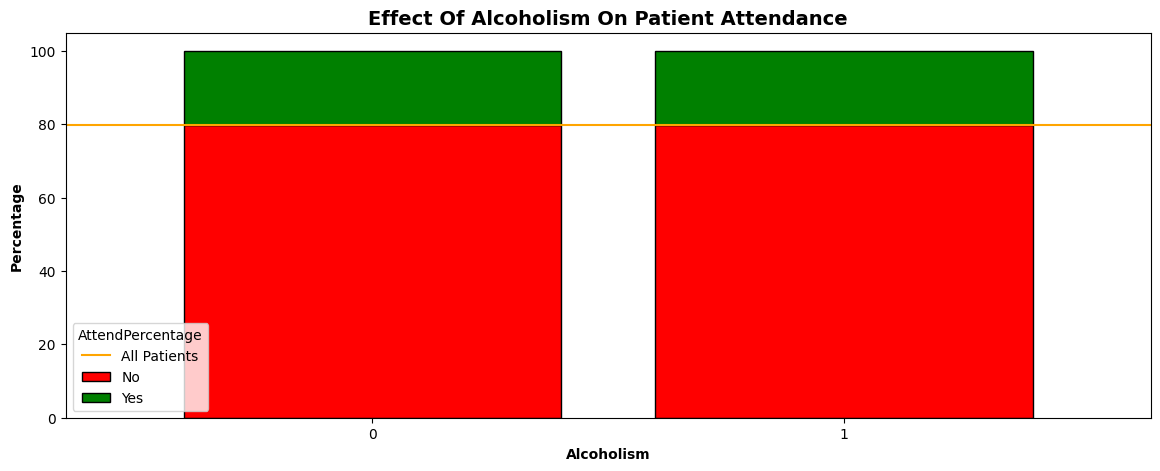

In [25]:
# Symptoms vs No-show status
for symptom in symptoms:
    myPercentagePlot(df,symptom)
    plt.show()

As we notice from the charts, we observe that hypertension, diabetes, and alcoholism have varying distributions among patients, with the majority of patients not having these conditions. When examining the effect of these conditions on appointment attendance, the second set of charts shows a high no-show rate across all three conditions, similar to the overall no-show trend for all patients. This suggests that having hypertension, diabetes, or alcoholism does not significantly alter the likelihood of attending or missing an appointment.

### Research Question 3  (Is there a significant difference in appointment attendance among different age groups when controlling for gender and symptoms?)


**Age Distribution**

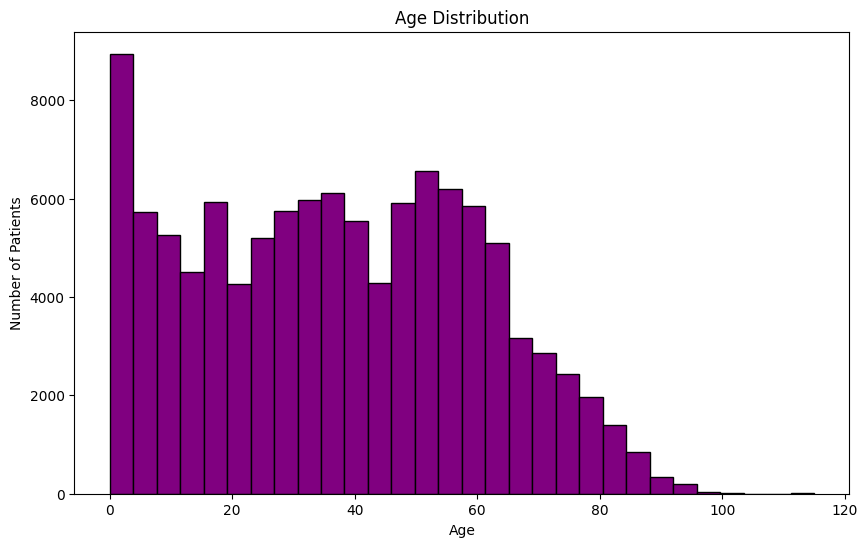

In [26]:
# Age distribution
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=30, color='purple', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

**Age vs. No-show Status**

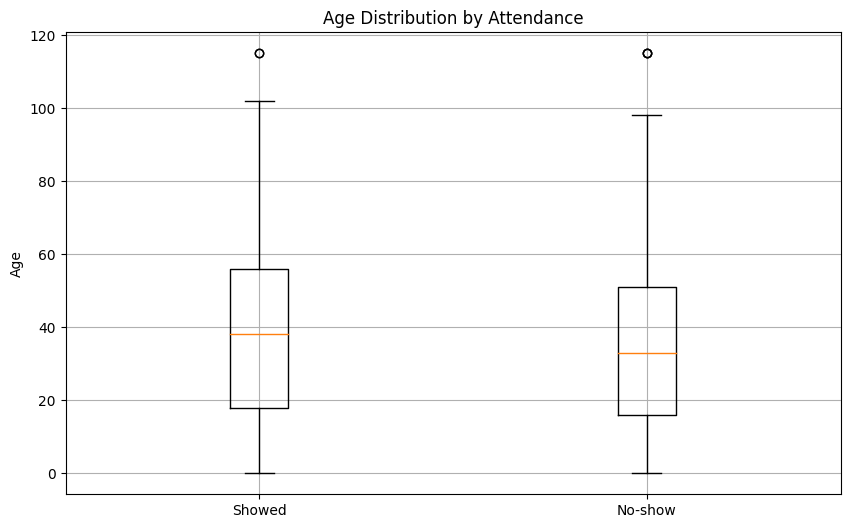

In [27]:
# Age vs No-show status
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['No-show'] == 'No']['Age'], df[df['No-show'] == 'Yes']['Age']],
            labels=['Showed', 'No-show'])
plt.title('Age Distribution by Attendance')
plt.ylabel('Age')
plt.grid()
plt.show()

As we notice from the charts, we explore the relationship between age and appointment attendance. The histogram shows the age distribution of patients, with higher patient numbers among younger individuals, particularly infants, and a more evenly spread distribution across adult age groups, tapering off in older ages. The box plot comparing age distribution by attendance status ("Showed" vs. "No-show") reveals that the median ages for both groups are quite similar, suggesting no strong age-based difference in attendance rates. However, there is a slight tendency for younger and older individuals to have a wider range in attendance outcomes, as shown by the extended whiskers and some outliers in both groups. This helps in assessing if certain age groups might have higher no-show rates, an important aspect when controlling for gender and symptoms.

<a id='conclusions'></a>
## Conclusions

This analysis looked into what factors might be influencing whether or not patients show up for their medical appointments.

Gender and Attendance: The data showed that most patients were female, and they also had a higher number of missed appointments. However, when we consider the number of no-shows relative to the total population size of each gender, men had a slightly higher no-show rate, suggesting that gender might play a role in attendance patterns.

Health Conditions and Attendance: We noticed that patients without conditions like hypertension or diabetes were more likely to miss appointments. Alcoholism didn’t seem to have a major impact on whether someone showed up or not. This means that certain health conditions might make patients more likely to keep their appointments.

Age and Attendance: The age analysis showed that younger patients, especially infants, were the largest group. There wasn’t a strong difference in attendance between age groups, though there was a bit more variability in attendance for very young and older patients.

Limitation: The analysis is based on a sample of data, which implies some level of uncertainty. Different samples might yield different results.

In short, gender, specific health conditions, and age may all play a part in whether patients attend their appointments. These insights could help healthcare providers make better decisions to improve attendance and patient care.

In [28]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 609518 bytes to Investigate_a_Dataset.html
